In [1]:
from helper.load_scalars import read_csv_files
from helper.check_count import check_count

import matplotlib.pyplot as plt
import matplotlib
import os
import re
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
matplotlib.style.use('seaborn-v0_8-paper')
matplotlib.rcParams["figure.figsize"] = [6.4, 4]

SMALL_FONT = 12
BIG_FONT = 14

GREY = '#999999'

In [4]:
directory_path = "./runs"
exp_data = read_csv_files(directory_path)

test_accuracy$s168740-cl1-cf128-dm-bn0.csv
test_accuracy$s168740-cl1-cf128-dm-bn1.csv
test_accuracy$s168740-cl1-cf128-dn-bn0.csv
test_accuracy$s168740-cl1-cf128-dn-bn1.csv
test_accuracy$s168740-cl1-cf128-ds-bn0.csv
test_accuracy$s168740-cl1-cf128-ds-bn1.csv
test_accuracy$s168740-cl1-cf16-dm-bn0.csv
test_accuracy$s168740-cl1-cf16-dm-bn1.csv
test_accuracy$s168740-cl1-cf16-dn-bn0.csv
test_accuracy$s168740-cl1-cf16-dn-bn1.csv
test_accuracy$s168740-cl1-cf16-ds-bn0.csv
test_accuracy$s168740-cl1-cf16-ds-bn1.csv
test_accuracy$s168740-cl1-cf32-dm-bn0.csv
test_accuracy$s168740-cl1-cf32-dm-bn1.csv
test_accuracy$s168740-cl1-cf32-dn-bn0.csv
test_accuracy$s168740-cl1-cf32-dn-bn1.csv
test_accuracy$s168740-cl1-cf32-ds-bn0.csv
test_accuracy$s168740-cl1-cf32-ds-bn1.csv
test_accuracy$s168740-cl1-cf64-dm-bn0.csv
test_accuracy$s168740-cl1-cf64-dm-bn1.csv
test_accuracy$s168740-cl1-cf64-dn-bn0.csv
test_accuracy$s168740-cl1-cf64-dn-bn1.csv
test_accuracy$s168740-cl1-cf64-ds-bn0.csv
test_accuracy$s168740-cl1-cf

In [5]:
count_dict = check_count(directory_path)

got 5 seeds: ['s168740', 's241223', 's314159', 's424242', 's856263']
# s168740: 9 metrics: ['test_accuracy', 'test_f1', 'test_loss', 'train_accuracy', 'train_f1', 'train_loss', 'validation_accuracy', 'validation_f1', 'validation_loss']
# s241223: 9 metrics: ['test_accuracy', 'test_f1', 'test_loss', 'train_accuracy', 'train_f1', 'train_loss', 'validation_accuracy', 'validation_f1', 'validation_loss']
# s314159: 9 metrics: ['test_accuracy', 'test_f1', 'test_loss', 'train_accuracy', 'train_f1', 'train_loss', 'validation_accuracy', 'validation_f1', 'validation_loss']
# s424242: 9 metrics: ['test_accuracy', 'test_f1', 'test_loss', 'train_accuracy', 'train_f1', 'train_loss', 'validation_accuracy', 'validation_f1', 'validation_loss']
# s856263: 9 metrics: ['test_accuracy', 'test_f1', 'test_loss', 'train_accuracy', 'train_f1', 'train_loss', 'validation_accuracy', 'validation_f1', 'validation_loss']
---
# s168740 # test_accuracy: 120 models
# s168740 # test_f1: 120 models
# s168740 # test_loss:

In [6]:
def legend_label(src):
    # directory, seed, runid = src.split('_')
    return "-".join(src.split('-')[0:2]).replace('-', ' ')

In [7]:
def model_name_sort(string):
    # Extracting cl and cf numbers using regular expressions
    match = re.match(r'cl(\d+)-cf(\d+)-dn-bn(\d+)', string)
    if match:
        cl_number = int(match.group(1))
        cf_number = int(match.group(2))
        return (cl_number, cf_number)
    else:
        # If the string doesn't match the expected pattern, place it at the end
        return (float('inf'), float('inf'))

In [8]:
def get_sorted_values(metric_data, metric, filter):
    labels = []
    data = []
    for model, results in metric_data[metric].items():
        if not model.endswith(filter): continue
        # print(results)
        model_data=[]
        labels.append(model)
        for result in results:
            model_data.append(result['y'][-1])
        data.append(model_data)

    combined_data = list(zip(labels, data))
    sorted_combined_data = sorted(combined_data, key=lambda x: model_name_sort(x[0]))
    sorted_labels, sorted_data = zip(*sorted_combined_data)
    return sorted_labels, sorted_data

('cl1-cf16-dn-bn0', 'cl1-cf32-dn-bn0', 'cl1-cf64-dn-bn0', 'cl1-cf128-dn-bn0', 'cl2-cf16-dn-bn0', 'cl2-cf32-dn-bn0', 'cl2-cf64-dn-bn0', 'cl2-cf128-dn-bn0', 'cl3-cf16-dn-bn0', 'cl3-cf32-dn-bn0', 'cl3-cf64-dn-bn0', 'cl3-cf128-dn-bn0', 'cl4-cf16-dn-bn0', 'cl4-cf32-dn-bn0', 'cl4-cf64-dn-bn0', 'cl4-cf128-dn-bn0', 'cl5-cf16-dn-bn0', 'cl5-cf32-dn-bn0', 'cl5-cf64-dn-bn0', 'cl5-cf128-dn-bn0')
([0.787804901599884, 0.795121967792511, 0.7585365772247314, 0.790243923664093, 0.792682945728302], [0.8024390339851379, 0.8048780560493469, 0.800000011920929, 0.8073170781135559, 0.79756098985672], [0.8024390339851379, 0.795121967792511, 0.8048780560493469, 0.7585365772247314, 0.792682945728302], [0.8146341443061829, 0.792682945728302, 0.795121967792511, 0.8048780560493469, 0.8097561001777649], [0.8073170781135559, 0.792682945728302, 0.7829268574714661, 0.8024390339851379, 0.790243923664093], [0.8268292546272278, 0.8121951222419739, 0.8097561001777649, 0.8195121884346008, 0.8219512104988098], [0.83902436494

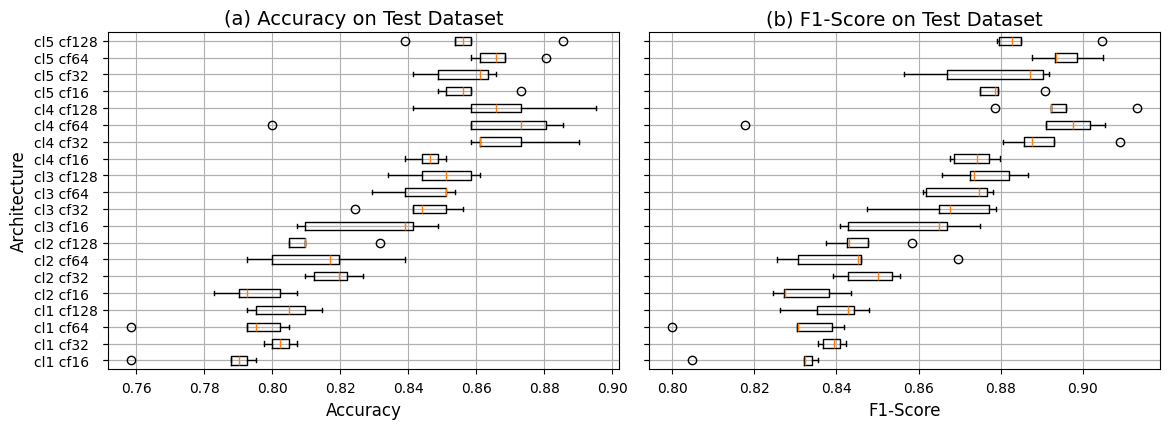

In [9]:
acc_sorted_labels, acc_sorted_data = get_sorted_values(exp_data, 'test_accuracy', '-dn-bn0')
print(acc_sorted_labels)
print(acc_sorted_data)

f1_sorted_labels, f1_sorted_data = get_sorted_values(exp_data, 'test_f1', '-dn-bn0')
print(f1_sorted_labels)
print(f1_sorted_data)

fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(11.8, 4.4))

ax[0].boxplot(acc_sorted_data, labels=[legend_label(l) for l in acc_sorted_labels], vert=False)

ax[0].set_xlabel('Accuracy', fontsize=SMALL_FONT)
ax[0].set_ylabel('Architecture', fontsize=SMALL_FONT)

ax[0].tick_params(axis='y', which='major', pad=50)    
ax[0].set_yticklabels(ax[0].get_yticklabels(), horizontalalignment='left', fontsize=10)
ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=10)
ax[0].set_title("(a) Accuracy on Test Dataset", fontsize=BIG_FONT)

ax[1].boxplot(f1_sorted_data, labels=[legend_label(l) for l in f1_sorted_labels], vert=False)
ax[1].set_xlabel('F1-Score', fontsize=SMALL_FONT)
ax[1].set_title("(b) F1-Score on Test Dataset", fontsize=BIG_FONT)
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=10)


ax[0].grid()
ax[1].grid()
fig.tight_layout()
plt.show()
fig.savefig(os.path.join('figures', 'e1-test-acc-f1.pdf'), bbox_inches='tight')


In [10]:
def get_metric_datapoints(metric, model):
    data = [seed['y'] for seed in exp_data[metric][model]]
    return np.mean(data, axis=0), np.std(data, axis=0)


In [11]:
y_train_loss_mean, y_train_loss_std = get_metric_datapoints('train_loss', 'cl4-cf128-dn-bn0')
y_train_loss_mean

array([0.62872813, 0.57852963, 0.55189985, 0.52683252, 0.50596609,
       0.48030571, 0.4568683 , 0.44691817, 0.4256987 , 0.41462215,
       0.39737952, 0.38478147, 0.36910959, 0.36303594, 0.35306472,
       0.34653363, 0.33419645, 0.31972239, 0.31521637, 0.30525206,
       0.29875116, 0.28313333, 0.27469158, 0.27174435, 0.25869953,
       0.24894106, 0.23671343, 0.23177175, 0.22561304, 0.2142788 ,
       0.21280606, 0.20609   , 0.19719117, 0.19544138, 0.18906048,
       0.17428414, 0.16622969, 0.15930814, 0.15571781, 0.14956242,
       0.1410218 , 0.13689285, 0.14341184, 0.13300392, 0.11696155,
       0.11778344, 0.11230443, 0.11104757, 0.11800279, 0.10705535])

In [12]:
y_val_loss_mean, y_val_loss_std = get_metric_datapoints('validation_loss', 'cl4-cf128-dn-bn0')
y_val_loss_mean

array([0.62037854, 0.57547719, 0.55001342, 0.52204701, 0.49678878,
       0.48530618, 0.4770377 , 0.45778968, 0.45752738, 0.44341282,
       0.42870529, 0.41955519, 0.42016034, 0.41342035, 0.41061758,
       0.40452763, 0.40463966, 0.39364282, 0.38459275, 0.38641139,
       0.3766753 , 0.37637607, 0.38333799, 0.37549916, 0.36987959,
       0.37349867, 0.37049246, 0.37795994, 0.38894052, 0.37881394,
       0.37702518, 0.39523428, 0.40587679, 0.40652974, 0.38425311,
       0.41934322, 0.42120665, 0.43440793, 0.43201736, 0.44485081,
       0.46311819, 0.43340812, 0.50171207, 0.48916934, 0.52130259,
       0.48207402, 0.50567217, 0.50936672, 0.5553627 , 0.50152004])

In [13]:
y_val_acc_mean, y_val_acc_std = get_metric_datapoints('validation_accuracy', 'cl4-cf128-dn-bn0')
y_val_acc_mean

array([0.66384039, 0.6947631 , 0.70074815, 0.71970074, 0.74812967,
       0.74713217, 0.77256858, 0.7765586 , 0.77855362, 0.7990025 ,
       0.81446384, 0.81097258, 0.81147132, 0.81097257, 0.8104738 ,
       0.81446384, 0.81745635, 0.82344137, 0.83042395, 0.82992519,
       0.84089775, 0.83690773, 0.83790524, 0.83341645, 0.84438903,
       0.84937656, 0.85536159, 0.85037407, 0.85037407, 0.85635909,
       0.8563591 , 0.8498753 , 0.85486283, 0.85137156, 0.86533666,
       0.85286782, 0.85536158, 0.84837905, 0.84738154, 0.85536159,
       0.85386533, 0.86134664, 0.8508728 , 0.84987531, 0.8533666 ,
       0.85935161, 0.85536159, 0.85137156, 0.83740649, 0.85935161])

In [14]:
y_val_f1_mean, y_val_f1_std = get_metric_datapoints('validation_f1', 'cl4-cf128-dn-bn0')
y_val_f1_mean

array([0.74550308, 0.74543772, 0.76031703, 0.77595963, 0.79266721,
       0.79832727, 0.82078594, 0.82068346, 0.81213756, 0.82634712,
       0.84045558, 0.83819273, 0.83908613, 0.83818016, 0.84371941,
       0.8458537 , 0.84791573, 0.85442586, 0.86002883, 0.85792165,
       0.86642236, 0.86243362, 0.86259395, 0.8631193 , 0.87041998,
       0.87410178, 0.88133129, 0.8764928 , 0.87336224, 0.8795602 ,
       0.879643  , 0.87191306, 0.87586741, 0.87727315, 0.88637372,
       0.87360563, 0.88062146, 0.87353587, 0.87115459, 0.87734305,
       0.87707603, 0.88449818, 0.87053523, 0.87131729, 0.87499291,
       0.88173389, 0.87727989, 0.87685636, 0.87042639, 0.8880704 ])

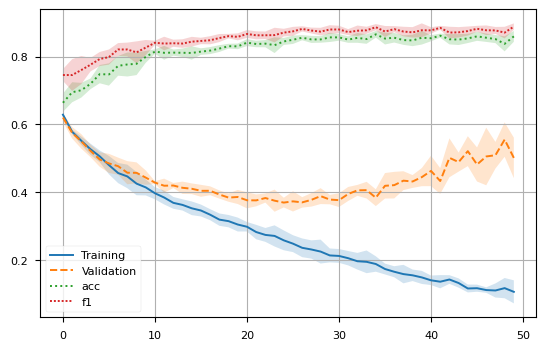

In [15]:
plt.plot(np.arange(0,50), y_train_loss_mean, "-", label='Training')
plt.fill_between(np.arange(0,50), y_train_loss_mean - y_train_loss_std, y_train_loss_mean + y_train_loss_std, alpha=0.2)

plt.plot(np.arange(0,50), y_val_loss_mean, "--", label='Validation')
plt.fill_between(np.arange(0,50), y_val_loss_mean - y_val_loss_std, y_val_loss_mean + y_val_loss_std, alpha=0.2)

plt.plot(np.arange(0,50), y_val_acc_mean, ":", label='acc')
plt.fill_between(np.arange(0,50), y_val_acc_mean - y_val_acc_std, y_val_acc_mean + y_val_acc_std, alpha=0.2)

plt.plot(np.arange(0,50), y_val_f1_mean, linestyle=(0, (1, 1)), label='f1')
plt.fill_between(np.arange(0,50), y_val_f1_mean - y_val_f1_std, y_val_f1_mean + y_val_f1_std, alpha=0.2)

plt.grid()
plt.legend()

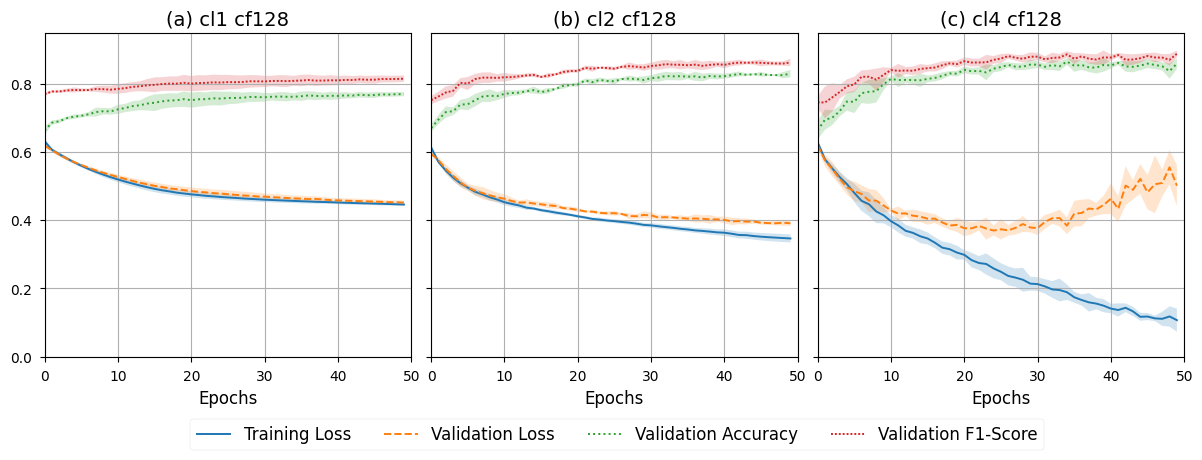

In [16]:
fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(12, 4))


model_1 = 'cl1-cf128-dn-bn0'
y_train_loss_mean_1, y_train_loss_std_1 = get_metric_datapoints('train_loss', model_1)
axs[0].plot(np.arange(0,50), y_train_loss_mean_1, "-", label='Training Loss')
axs[0].fill_between(np.arange(0,50), y_train_loss_mean_1 - y_train_loss_std_1, y_train_loss_mean_1 + y_train_loss_std_1, alpha=0.2)

y_val_loss_mean_1, y_val_loss_std_1 = get_metric_datapoints('validation_loss', model_1)
axs[0].plot(np.arange(0,50), y_val_loss_mean_1, "--", label='Validation Loss')
axs[0].fill_between(np.arange(0,50), y_val_loss_mean_1 - y_val_loss_std_1, y_val_loss_mean_1 + y_val_loss_std_1, alpha=0.2)

y_val_acc_mean_1, y_val_acc_std_1 = get_metric_datapoints('validation_accuracy', model_1)
axs[0].plot(np.arange(0,50), y_val_acc_mean_1, ":", label='Validation Accuracy')
axs[0].fill_between(np.arange(0,50), y_val_acc_mean_1 - y_val_acc_std_1, y_val_acc_mean_1 + y_val_acc_std_1, alpha=0.2)

y_val_f1_mean_1, y_val_f1_std_1 = get_metric_datapoints('validation_f1', model_1)
axs[0].plot(np.arange(0,50), y_val_f1_mean_1, linestyle=(0, (1, 1)), label='Validation F1-Score')
axs[0].fill_between(np.arange(0,50), y_val_f1_mean_1 - y_val_f1_std_1, y_val_f1_mean_1 + y_val_f1_std_1, alpha=0.2)

axs[0].set_title('(a) cl1 cf128', fontsize=BIG_FONT)


model_2 = 'cl2-cf128-dn-bn0'
y_train_loss_mean_2, y_train_loss_std_2 = get_metric_datapoints('train_loss', model_2)
axs[1].plot(np.arange(0,50), y_train_loss_mean_2, "-")
axs[1].fill_between(np.arange(0,50), y_train_loss_mean_2 - y_train_loss_std_2, y_train_loss_mean_2 + y_train_loss_std_2, alpha=0.2)

y_val_loss_mean_2, y_val_loss_std_2 = get_metric_datapoints('validation_loss', model_2)
axs[1].plot(np.arange(0,50), y_val_loss_mean_2, "--")
axs[1].fill_between(np.arange(0,50), y_val_loss_mean_2 - y_val_loss_std_2, y_val_loss_mean_2 + y_val_loss_std_2, alpha=0.2)

y_val_acc_mean_2, y_val_acc_std_2 = get_metric_datapoints('validation_accuracy', model_2)
axs[1].plot(np.arange(0,50), y_val_acc_mean_2, ":")
axs[1].fill_between(np.arange(0,50), y_val_acc_mean_2 - y_val_acc_std_2, y_val_acc_mean_2 + y_val_acc_std_2, alpha=0.2)

y_val_f1_mean_2, y_val_f1_std_2 = get_metric_datapoints('validation_f1', model_2)
axs[1].plot(np.arange(0,50), y_val_f1_mean_2, linestyle=(0, (1, 1)))
axs[1].fill_between(np.arange(0,50), y_val_f1_mean_2 - y_val_f1_std_2, y_val_f1_mean_2 + y_val_f1_std_2, alpha=0.2)

axs[1].set_title('(b) cl2 cf128', fontsize=BIG_FONT)


model_3 = 'cl4-cf128-dn-bn0'
y_train_loss_mean_3, y_train_loss_std_3 = get_metric_datapoints('train_loss', model_3)
axs[2].plot(np.arange(0,50), y_train_loss_mean_3, "-")
axs[2].fill_between(np.arange(0,50), y_train_loss_mean_3 - y_train_loss_std_3, y_train_loss_mean_3 + y_train_loss_std_3, alpha=0.2)

y_val_loss_mean_3, y_val_loss_std_3 = get_metric_datapoints('validation_loss', model_3)
axs[2].plot(np.arange(0,50), y_val_loss_mean_3, "--")
axs[2].fill_between(np.arange(0,50), y_val_loss_mean_3 - y_val_loss_std_3, y_val_loss_mean_3 + y_val_loss_std_3, alpha=0.2)

y_val_acc_mean_3, y_val_acc_std_3 = get_metric_datapoints('validation_accuracy', model_3)
axs[2].plot(np.arange(0,50), y_val_acc_mean_3, ":")
axs[2].fill_between(np.arange(0,50), y_val_acc_mean_3 - y_val_acc_std_3, y_val_acc_mean_3 + y_val_acc_std_3, alpha=0.2)

y_val_f1_mean_3, y_val_f1_std_3 = get_metric_datapoints('validation_f1', model_3)
axs[2].plot(np.arange(0,50), y_val_f1_mean_3, linestyle=(0, (1, 1)))
axs[2].fill_between(np.arange(0,50), y_val_f1_mean_3 - y_val_f1_std_3, y_val_f1_mean_3 + y_val_f1_std_3, alpha=0.2)

axs[2].set_title('(c) cl4 cf128', fontsize=BIG_FONT)


fig.tight_layout()
for ax in axs:
    ax.grid()
    ax.set_xlabel("Epochs", fontsize=SMALL_FONT)
    ax.set_xlim(0,50)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_ylim(0,0.95)
    
fig.legend(loc='center', bbox_to_anchor=(0.515, -0.1),frameon=True, fontsize=SMALL_FONT, ncols=4)
plt.show()
fig.savefig(os.path.join('figures', 'e1-train-val-loss-examples.pdf'), bbox_inches='tight')

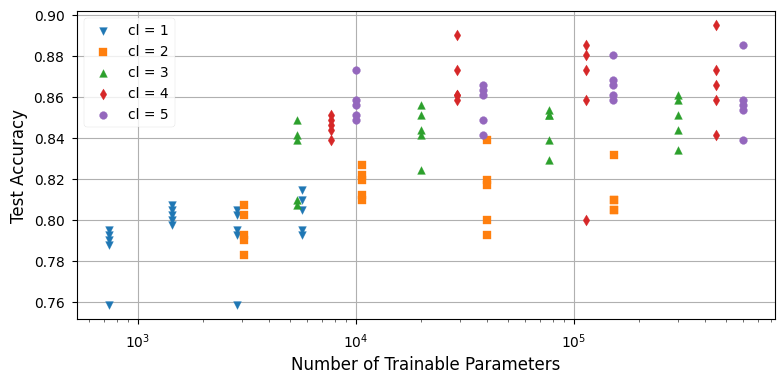

In [17]:
model_parameter_count = {
    'cl1-cf16-dn-bn0': 737,
    'cl1-cf32-dn-bn0': 1441,
    'cl1-cf64-dn-bn0': 2849,
    'cl1-cf128-dn-bn0': 5665,
    'cl2-cf16-dn-bn0': 3057,
    'cl2-cf32-dn-bn0': 10689,
    'cl2-cf64-dn-bn0': 39777,
    'cl2-cf128-dn-bn0': 153249,
    'cl3-cf16-dn-bn0': 5377,
    'cl3-cf32-dn-bn0': 19937,
    'cl3-cf64-dn-bn0': 76705,
    'cl3-cf128-dn-bn0': 300833,
    'cl4-cf16-dn-bn0': 7697,
    'cl4-cf32-dn-bn0': 29185,
    'cl4-cf64-dn-bn0': 113633,
    'cl4-cf128-dn-bn0': 448417,
    'cl5-cf16-dn-bn0': 10017,
    'cl5-cf32-dn-bn0': 38433,
    'cl5-cf64-dn-bn0': 150561,
    'cl5-cf128-dn-bn0': 596001
}

f1_sorted_labels, f1_sorted_data = get_sorted_values(exp_data, 'test_accuracy', '-dn-bn0')
model_parameter = [[model_parameter_count[model]]*5 for model in f1_sorted_labels]

fig, ax = plt.subplots(figsize = (9,4))
ax.scatter(np.array(model_parameter).flatten()[:20], np.array(f1_sorted_data).flatten()[:20], marker='v', label="cl = 1")
ax.scatter(np.array(model_parameter).flatten()[20:40], np.array(f1_sorted_data).flatten()[20:40], marker='s', label="cl = 2")
ax.scatter(np.array(model_parameter).flatten()[40:60], np.array(f1_sorted_data).flatten()[40:60], marker='^', label="cl = 3")
ax.scatter(np.array(model_parameter).flatten()[60:80], np.array(f1_sorted_data).flatten()[60:80], marker='d', label="cl = 4")
ax.scatter(np.array(model_parameter).flatten()[80:100], np.array(f1_sorted_data).flatten()[80:100], marker='o', label="cl = 5")
ax.set_xscale("log")
ax.set_xlabel("Number of Trainable Parameters", fontsize=SMALL_FONT)
ax.set_ylabel("Test Accuracy", fontsize=SMALL_FONT)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(fontsize=10)
ax.grid(which='major')
ax.set_axisbelow(True)
plt.show()
fig.savefig(os.path.join('figures', 'e1-acc-param-count.pdf'), bbox_inches='tight')

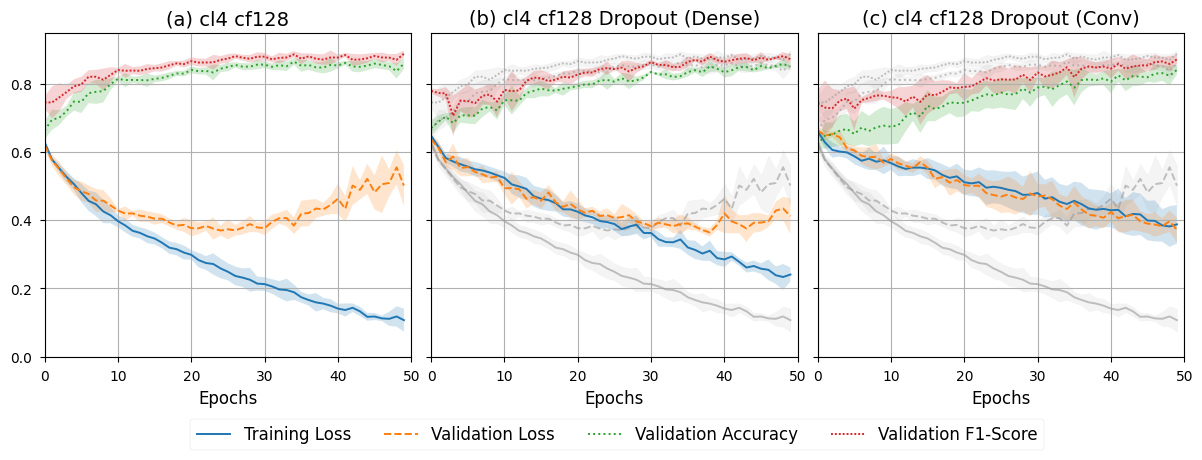

In [18]:
fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(12, 4))


model_1 = 'cl4-cf128-dn-bn0'
y_train_loss_mean_1, y_train_loss_std_1 = get_metric_datapoints('train_loss', model_1)
axs[0].plot(np.arange(0,50), y_train_loss_mean_1, "-", label='Training Loss')
axs[0].fill_between(np.arange(0,50), y_train_loss_mean_1 - y_train_loss_std_1, y_train_loss_mean_1 + y_train_loss_std_1, alpha=0.2)

y_val_loss_mean_1, y_val_loss_std_1 = get_metric_datapoints('validation_loss', model_1)
axs[0].plot(np.arange(0,50), y_val_loss_mean_1, "--", label='Validation Loss')
axs[0].fill_between(np.arange(0,50), y_val_loss_mean_1 - y_val_loss_std_1, y_val_loss_mean_1 + y_val_loss_std_1, alpha=0.2)

y_val_acc_mean_1, y_val_acc_std_1 = get_metric_datapoints('validation_accuracy', model_1)
axs[0].plot(np.arange(0,50), y_val_acc_mean_1, ":", label='Validation Accuracy')
axs[0].fill_between(np.arange(0,50), y_val_acc_mean_1 - y_val_acc_std_1, y_val_acc_mean_1 + y_val_acc_std_1, alpha=0.2)

y_val_f1_mean_1, y_val_f1_std_1 = get_metric_datapoints('validation_f1', model_1)
axs[0].plot(np.arange(0,50), y_val_f1_mean_1, linestyle=(0, (1, 1)), label='Validation F1-Score')
axs[0].fill_between(np.arange(0,50), y_val_f1_mean_1 - y_val_f1_std_1, y_val_f1_mean_1 + y_val_f1_std_1, alpha=0.2)

axs[0].set_title('(a) cl4 cf128', fontsize=BIG_FONT)


y_train_loss_mean_1, y_train_loss_std_1 = get_metric_datapoints('train_loss', model_1)
axs[1].plot(np.arange(0,50), y_train_loss_mean_1, "-", color=GREY, alpha=0.6)
axs[1].fill_between(np.arange(0,50), y_train_loss_mean_1 - y_train_loss_std_1, y_train_loss_mean_1 + y_train_loss_std_1, alpha=0.1, color=GREY)

y_val_loss_mean_1, y_val_loss_std_1 = get_metric_datapoints('validation_loss', model_1)
axs[1].plot(np.arange(0,50), y_val_loss_mean_1, "--", color=GREY, alpha=0.6)
axs[1].fill_between(np.arange(0,50), y_val_loss_mean_1 - y_val_loss_std_1, y_val_loss_mean_1 + y_val_loss_std_1, alpha=0.1, color=GREY)

y_val_acc_mean_1, y_val_acc_std_1 = get_metric_datapoints('validation_accuracy', model_1)
axs[1].plot(np.arange(0,50), y_val_acc_mean_1, ":",  color=GREY, alpha=0.6)
axs[1].fill_between(np.arange(0,50), y_val_acc_mean_1 - y_val_acc_std_1, y_val_acc_mean_1 + y_val_acc_std_1, alpha=0.1, color=GREY)

y_val_f1_mean_1, y_val_f1_std_1 = get_metric_datapoints('validation_f1', model_1)
axs[1].plot(np.arange(0,50), y_val_f1_mean_1, linestyle=(0, (1, 1)), color=GREY, alpha=0.6)
axs[1].fill_between(np.arange(0,50), y_val_f1_mean_1 - y_val_f1_std_1, y_val_f1_mean_1 + y_val_f1_std_1, alpha=0.1, color=GREY)

model_2 = 'cl4-cf128-ds-bn0'
y_train_loss_mean_2, y_train_loss_std_2 = get_metric_datapoints('train_loss', model_2)
axs[1].plot(np.arange(0,50), y_train_loss_mean_2, "-")
axs[1].fill_between(np.arange(0,50), y_train_loss_mean_2 - y_train_loss_std_2, y_train_loss_mean_2 + y_train_loss_std_2, alpha=0.2)

y_val_loss_mean_2, y_val_loss_std_2 = get_metric_datapoints('validation_loss', model_2)
axs[1].plot(np.arange(0,50), y_val_loss_mean_2, "--")
axs[1].fill_between(np.arange(0,50), y_val_loss_mean_2 - y_val_loss_std_2, y_val_loss_mean_2 + y_val_loss_std_2, alpha=0.2)

y_val_acc_mean_2, y_val_acc_std_2 = get_metric_datapoints('validation_accuracy', model_2)
axs[1].plot(np.arange(0,50), y_val_acc_mean_2, ":")
axs[1].fill_between(np.arange(0,50), y_val_acc_mean_2 - y_val_acc_std_2, y_val_acc_mean_2 + y_val_acc_std_2, alpha=0.2)

y_val_f1_mean_2, y_val_f1_std_2 = get_metric_datapoints('validation_f1', model_2)
axs[1].plot(np.arange(0,50), y_val_f1_mean_2, linestyle=(0, (1, 1)))
axs[1].fill_between(np.arange(0,50), y_val_f1_mean_2 - y_val_f1_std_2, y_val_f1_mean_2 + y_val_f1_std_2, alpha=0.2)

axs[1].set_title('(b) cl4 cf128 Dropout (Dense)', fontsize=BIG_FONT)



y_train_loss_mean_1, y_train_loss_std_1 = get_metric_datapoints('train_loss', model_1)
axs[2].plot(np.arange(0,50), y_train_loss_mean_1, "-", color=GREY, alpha=0.6)
axs[2].fill_between(np.arange(0,50), y_train_loss_mean_1 - y_train_loss_std_1, y_train_loss_mean_1 + y_train_loss_std_1, alpha=0.1, color=GREY)

y_val_loss_mean_1, y_val_loss_std_1 = get_metric_datapoints('validation_loss', model_1)
axs[2].plot(np.arange(0,50), y_val_loss_mean_1, "--", color=GREY, alpha=0.6)
axs[2].fill_between(np.arange(0,50), y_val_loss_mean_1 - y_val_loss_std_1, y_val_loss_mean_1 + y_val_loss_std_1, alpha=0.1, color=GREY)

y_val_acc_mean_1, y_val_acc_std_1 = get_metric_datapoints('validation_accuracy', model_1)
axs[2].plot(np.arange(0,50), y_val_acc_mean_1, ":",  color=GREY, alpha=0.6)
axs[2].fill_between(np.arange(0,50), y_val_acc_mean_1 - y_val_acc_std_1, y_val_acc_mean_1 + y_val_acc_std_1, alpha=0.1, color=GREY)

y_val_f1_mean_1, y_val_f1_std_1 = get_metric_datapoints('validation_f1', model_1)
axs[2].plot(np.arange(0,50), y_val_f1_mean_1, linestyle=(0, (1, 1)), color=GREY, alpha=0.6)
axs[2].fill_between(np.arange(0,50), y_val_f1_mean_1 - y_val_f1_std_1, y_val_f1_mean_1 + y_val_f1_std_1, alpha=0.1, color=GREY)

model_3 = 'cl4-cf128-dm-bn0'
y_train_loss_mean_3, y_train_loss_std_3 = get_metric_datapoints('train_loss', model_3)
axs[2].plot(np.arange(0,50), y_train_loss_mean_3, "-")
axs[2].fill_between(np.arange(0,50), y_train_loss_mean_3 - y_train_loss_std_3, y_train_loss_mean_3 + y_train_loss_std_3, alpha=0.2)

y_val_loss_mean_3, y_val_loss_std_3 = get_metric_datapoints('validation_loss', model_3)
axs[2].plot(np.arange(0,50), y_val_loss_mean_3, "--")
axs[2].fill_between(np.arange(0,50), y_val_loss_mean_3 - y_val_loss_std_3, y_val_loss_mean_3 + y_val_loss_std_3, alpha=0.2)

y_val_acc_mean_3, y_val_acc_std_3 = get_metric_datapoints('validation_accuracy', model_3)
axs[2].plot(np.arange(0,50), y_val_acc_mean_3, ":")
axs[2].fill_between(np.arange(0,50), y_val_acc_mean_3 - y_val_acc_std_3, y_val_acc_mean_3 + y_val_acc_std_3, alpha=0.2)

y_val_f1_mean_3, y_val_f1_std_3 = get_metric_datapoints('validation_f1', model_3)
axs[2].plot(np.arange(0,50), y_val_f1_mean_3, linestyle=(0, (1, 1)))
axs[2].fill_between(np.arange(0,50), y_val_f1_mean_3 - y_val_f1_std_3, y_val_f1_mean_3 + y_val_f1_std_3, alpha=0.2)

axs[2].set_title('(c) cl4 cf128 Dropout (Conv)', fontsize=BIG_FONT)



fig.tight_layout()
for ax in axs:
    ax.grid()
    ax.set_xlabel("Epochs", fontsize=SMALL_FONT)
    ax.set_xlim(0,50)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_ylim(0,0.95)
    
fig.legend(loc='center', bbox_to_anchor=(0.515, -0.1),frameon=True, fontsize=SMALL_FONT, ncols=4)
plt.show()
fig.savefig(os.path.join('figures', 'e2-dropout-examples.pdf'), bbox_inches='tight')

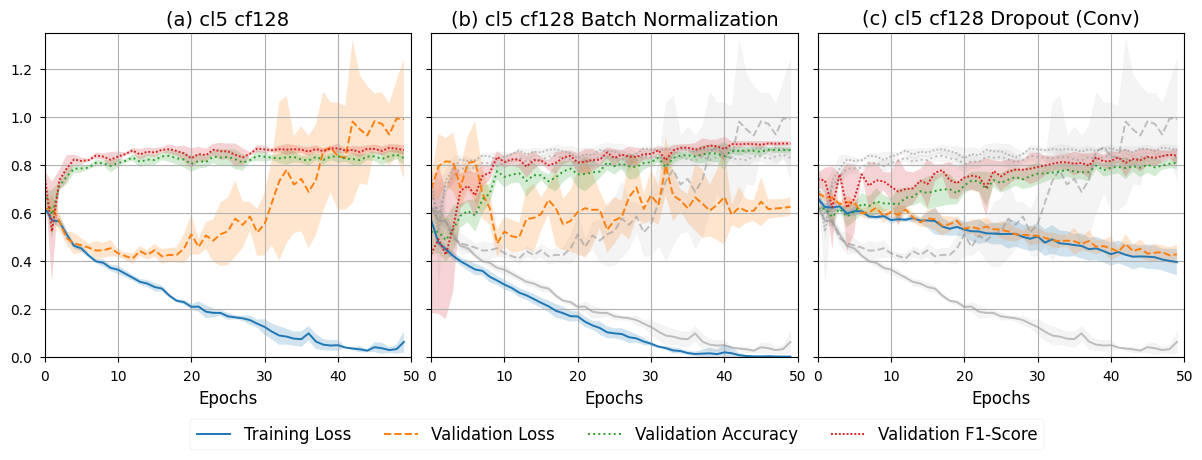

In [19]:
fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(12, 4))


model_1 = 'cl5-cf128-dn-bn0'
y_train_loss_mean_1, y_train_loss_std_1 = get_metric_datapoints('train_loss', model_1)
axs[0].plot(np.arange(0,50), y_train_loss_mean_1, "-", label='Training Loss')
axs[0].fill_between(np.arange(0,50), y_train_loss_mean_1 - y_train_loss_std_1, y_train_loss_mean_1 + y_train_loss_std_1, alpha=0.2)

y_val_loss_mean_1, y_val_loss_std_1 = get_metric_datapoints('validation_loss', model_1)
axs[0].plot(np.arange(0,50), y_val_loss_mean_1, "--", label='Validation Loss')
axs[0].fill_between(np.arange(0,50), y_val_loss_mean_1 - y_val_loss_std_1, y_val_loss_mean_1 + y_val_loss_std_1, alpha=0.2)

y_val_acc_mean_1, y_val_acc_std_1 = get_metric_datapoints('validation_accuracy', model_1)
axs[0].plot(np.arange(0,50), y_val_acc_mean_1, ":", label='Validation Accuracy')
axs[0].fill_between(np.arange(0,50), y_val_acc_mean_1 - y_val_acc_std_1, y_val_acc_mean_1 + y_val_acc_std_1, alpha=0.2)

y_val_f1_mean_1, y_val_f1_std_1 = get_metric_datapoints('validation_f1', model_1)
axs[0].plot(np.arange(0,50), y_val_f1_mean_1, linestyle=(0, (1, 1)), label='Validation F1-Score')
axs[0].fill_between(np.arange(0,50), y_val_f1_mean_1 - y_val_f1_std_1, y_val_f1_mean_1 + y_val_f1_std_1, alpha=0.2)

axs[0].set_title('(a) cl5 cf128', fontsize=BIG_FONT)


y_train_loss_mean_1, y_train_loss_std_1 = get_metric_datapoints('train_loss', model_1)
axs[1].plot(np.arange(0,50), y_train_loss_mean_1, "-", color=GREY, alpha=0.6)
axs[1].fill_between(np.arange(0,50), y_train_loss_mean_1 - y_train_loss_std_1, y_train_loss_mean_1 + y_train_loss_std_1, alpha=0.1, color=GREY)

y_val_loss_mean_1, y_val_loss_std_1 = get_metric_datapoints('validation_loss', model_1)
axs[1].plot(np.arange(0,50), y_val_loss_mean_1, "--", color=GREY, alpha=0.6)
axs[1].fill_between(np.arange(0,50), y_val_loss_mean_1 - y_val_loss_std_1, y_val_loss_mean_1 + y_val_loss_std_1, alpha=0.1, color=GREY)

y_val_acc_mean_1, y_val_acc_std_1 = get_metric_datapoints('validation_accuracy', model_1)
axs[1].plot(np.arange(0,50), y_val_acc_mean_1, ":",  color=GREY, alpha=0.6)
axs[1].fill_between(np.arange(0,50), y_val_acc_mean_1 - y_val_acc_std_1, y_val_acc_mean_1 + y_val_acc_std_1, alpha=0.1, color=GREY)

y_val_f1_mean_1, y_val_f1_std_1 = get_metric_datapoints('validation_f1', model_1)
axs[1].plot(np.arange(0,50), y_val_f1_mean_1, linestyle=(0, (1, 1)), color=GREY, alpha=0.6)
axs[1].fill_between(np.arange(0,50), y_val_f1_mean_1 - y_val_f1_std_1, y_val_f1_mean_1 + y_val_f1_std_1, alpha=0.1, color=GREY)

model_2 = 'cl5-cf128-dn-bn1'
y_train_loss_mean_2, y_train_loss_std_2 = get_metric_datapoints('train_loss', model_2)
axs[1].plot(np.arange(0,50), y_train_loss_mean_2, "-")
axs[1].fill_between(np.arange(0,50), y_train_loss_mean_2 - y_train_loss_std_2, y_train_loss_mean_2 + y_train_loss_std_2, alpha=0.2)

y_val_loss_mean_2, y_val_loss_std_2 = get_metric_datapoints('validation_loss', model_2)
axs[1].plot(np.arange(0,50), y_val_loss_mean_2, "--")
axs[1].fill_between(np.arange(0,50), y_val_loss_mean_2 - y_val_loss_std_2, y_val_loss_mean_2 + y_val_loss_std_2, alpha=0.2)

y_val_acc_mean_2, y_val_acc_std_2 = get_metric_datapoints('validation_accuracy', model_2)
axs[1].plot(np.arange(0,50), y_val_acc_mean_2, ":")
axs[1].fill_between(np.arange(0,50), y_val_acc_mean_2 - y_val_acc_std_2, y_val_acc_mean_2 + y_val_acc_std_2, alpha=0.2)

y_val_f1_mean_2, y_val_f1_std_2 = get_metric_datapoints('validation_f1', model_2)
axs[1].plot(np.arange(0,50), y_val_f1_mean_2, linestyle=(0, (1, 1)))
axs[1].fill_between(np.arange(0,50), y_val_f1_mean_2 - y_val_f1_std_2, y_val_f1_mean_2 + y_val_f1_std_2, alpha=0.2)

axs[1].set_title('(b) cl5 cf128 Batch Normalization', fontsize=BIG_FONT)

y_train_loss_mean_1, y_train_loss_std_1 = get_metric_datapoints('train_loss', model_1)
axs[2].plot(np.arange(0,50), y_train_loss_mean_1, "-", color=GREY, alpha=0.6)
axs[2].fill_between(np.arange(0,50), y_train_loss_mean_1 - y_train_loss_std_1, y_train_loss_mean_1 + y_train_loss_std_1, alpha=0.1, color=GREY)

y_val_loss_mean_1, y_val_loss_std_1 = get_metric_datapoints('validation_loss', model_1)
axs[2].plot(np.arange(0,50), y_val_loss_mean_1, "--", color=GREY, alpha=0.6)
axs[2].fill_between(np.arange(0,50), y_val_loss_mean_1 - y_val_loss_std_1, y_val_loss_mean_1 + y_val_loss_std_1, alpha=0.1, color=GREY)

y_val_acc_mean_1, y_val_acc_std_1 = get_metric_datapoints('validation_accuracy', model_1)
axs[2].plot(np.arange(0,50), y_val_acc_mean_1, ":",  color=GREY, alpha=0.6)
axs[2].fill_between(np.arange(0,50), y_val_acc_mean_1 - y_val_acc_std_1, y_val_acc_mean_1 + y_val_acc_std_1, alpha=0.1, color=GREY)

y_val_f1_mean_1, y_val_f1_std_1 = get_metric_datapoints('validation_f1', model_1)
axs[2].plot(np.arange(0,50), y_val_f1_mean_1, linestyle=(0, (1, 1)), color=GREY, alpha=0.6)
axs[2].fill_between(np.arange(0,50), y_val_f1_mean_1 - y_val_f1_std_1, y_val_f1_mean_1 + y_val_f1_std_1, alpha=0.1, color=GREY)

model_3 = 'cl5-cf128-dm-bn0'
y_train_loss_mean_3, y_train_loss_std_3 = get_metric_datapoints('train_loss', model_3)
axs[2].plot(np.arange(0,50), y_train_loss_mean_3, "-")
axs[2].fill_between(np.arange(0,50), y_train_loss_mean_3 - y_train_loss_std_3, y_train_loss_mean_3 + y_train_loss_std_3, alpha=0.2)

y_val_loss_mean_3, y_val_loss_std_3 = get_metric_datapoints('validation_loss', model_3)
axs[2].plot(np.arange(0,50), y_val_loss_mean_3, "--")
axs[2].fill_between(np.arange(0,50), y_val_loss_mean_3 - y_val_loss_std_3, y_val_loss_mean_3 + y_val_loss_std_3, alpha=0.2)

y_val_acc_mean_3, y_val_acc_std_3 = get_metric_datapoints('validation_accuracy', model_3)
axs[2].plot(np.arange(0,50), y_val_acc_mean_3, ":")
axs[2].fill_between(np.arange(0,50), y_val_acc_mean_3 - y_val_acc_std_3, y_val_acc_mean_3 + y_val_acc_std_3, alpha=0.2)

y_val_f1_mean_3, y_val_f1_std_3 = get_metric_datapoints('validation_f1', model_3)
axs[2].plot(np.arange(0,50), y_val_f1_mean_3, linestyle=(0, (1, 1)))
axs[2].fill_between(np.arange(0,50), y_val_f1_mean_3 - y_val_f1_std_3, y_val_f1_mean_3 + y_val_f1_std_3, alpha=0.2)

axs[2].set_title('(c) cl5 cf128 Dropout (Conv)', fontsize=BIG_FONT)



fig.tight_layout()
for ax in axs:
    ax.grid()
    ax.set_xlabel("Epochs", fontsize=SMALL_FONT)
    ax.set_xlim(0,50)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_ylim(0,1.35)
    
fig.legend(loc='center', bbox_to_anchor=(0.515, -0.1),frameon=True, fontsize=SMALL_FONT, ncols=4)
plt.show()
fig.savefig(os.path.join('figures', 'e2-bn-example.pdf'), bbox_inches='tight')

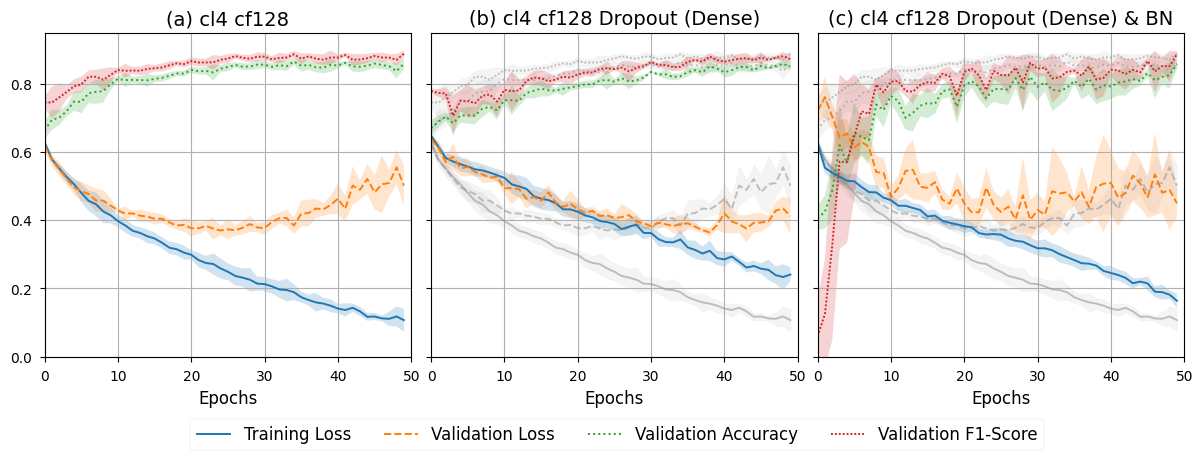

In [20]:
fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(12, 4))


model_1 = 'cl4-cf128-dn-bn0'
y_train_loss_mean_1, y_train_loss_std_1 = get_metric_datapoints('train_loss', model_1)
axs[0].plot(np.arange(0,50), y_train_loss_mean_1, "-", label='Training Loss')
axs[0].fill_between(np.arange(0,50), y_train_loss_mean_1 - y_train_loss_std_1, y_train_loss_mean_1 + y_train_loss_std_1, alpha=0.2)

y_val_loss_mean_1, y_val_loss_std_1 = get_metric_datapoints('validation_loss', model_1)
axs[0].plot(np.arange(0,50), y_val_loss_mean_1, "--", label='Validation Loss')
axs[0].fill_between(np.arange(0,50), y_val_loss_mean_1 - y_val_loss_std_1, y_val_loss_mean_1 + y_val_loss_std_1, alpha=0.2)

y_val_acc_mean_1, y_val_acc_std_1 = get_metric_datapoints('validation_accuracy', model_1)
axs[0].plot(np.arange(0,50), y_val_acc_mean_1, ":", label='Validation Accuracy')
axs[0].fill_between(np.arange(0,50), y_val_acc_mean_1 - y_val_acc_std_1, y_val_acc_mean_1 + y_val_acc_std_1, alpha=0.2)

y_val_f1_mean_1, y_val_f1_std_1 = get_metric_datapoints('validation_f1', model_1)
axs[0].plot(np.arange(0,50), y_val_f1_mean_1, linestyle=(0, (1, 1)), label='Validation F1-Score')
axs[0].fill_between(np.arange(0,50), y_val_f1_mean_1 - y_val_f1_std_1, y_val_f1_mean_1 + y_val_f1_std_1, alpha=0.2)

axs[0].set_title('(a) cl4 cf128', fontsize=BIG_FONT)


y_train_loss_mean_1, y_train_loss_std_1 = get_metric_datapoints('train_loss', model_1)
axs[1].plot(np.arange(0,50), y_train_loss_mean_1, "-", color=GREY, alpha=0.6)
axs[1].fill_between(np.arange(0,50), y_train_loss_mean_1 - y_train_loss_std_1, y_train_loss_mean_1 + y_train_loss_std_1, alpha=0.1, color=GREY)

y_val_loss_mean_1, y_val_loss_std_1 = get_metric_datapoints('validation_loss', model_1)
axs[1].plot(np.arange(0,50), y_val_loss_mean_1, "--", color=GREY, alpha=0.6)
axs[1].fill_between(np.arange(0,50), y_val_loss_mean_1 - y_val_loss_std_1, y_val_loss_mean_1 + y_val_loss_std_1, alpha=0.1, color=GREY)

y_val_acc_mean_1, y_val_acc_std_1 = get_metric_datapoints('validation_accuracy', model_1)
axs[1].plot(np.arange(0,50), y_val_acc_mean_1, ":",  color=GREY, alpha=0.6)
axs[1].fill_between(np.arange(0,50), y_val_acc_mean_1 - y_val_acc_std_1, y_val_acc_mean_1 + y_val_acc_std_1, alpha=0.1, color=GREY)

y_val_f1_mean_1, y_val_f1_std_1 = get_metric_datapoints('validation_f1', model_1)
axs[1].plot(np.arange(0,50), y_val_f1_mean_1, linestyle=(0, (1, 1)), color=GREY, alpha=0.6)
axs[1].fill_between(np.arange(0,50), y_val_f1_mean_1 - y_val_f1_std_1, y_val_f1_mean_1 + y_val_f1_std_1, alpha=0.1, color=GREY)

model_2 = 'cl4-cf128-ds-bn0'
y_train_loss_mean_2, y_train_loss_std_2 = get_metric_datapoints('train_loss', model_2)
axs[1].plot(np.arange(0,50), y_train_loss_mean_2, "-")
axs[1].fill_between(np.arange(0,50), y_train_loss_mean_2 - y_train_loss_std_2, y_train_loss_mean_2 + y_train_loss_std_2, alpha=0.2)

y_val_loss_mean_2, y_val_loss_std_2 = get_metric_datapoints('validation_loss', model_2)
axs[1].plot(np.arange(0,50), y_val_loss_mean_2, "--")
axs[1].fill_between(np.arange(0,50), y_val_loss_mean_2 - y_val_loss_std_2, y_val_loss_mean_2 + y_val_loss_std_2, alpha=0.2)

y_val_acc_mean_2, y_val_acc_std_2 = get_metric_datapoints('validation_accuracy', model_2)
axs[1].plot(np.arange(0,50), y_val_acc_mean_2, ":")
axs[1].fill_between(np.arange(0,50), y_val_acc_mean_2 - y_val_acc_std_2, y_val_acc_mean_2 + y_val_acc_std_2, alpha=0.2)

y_val_f1_mean_2, y_val_f1_std_2 = get_metric_datapoints('validation_f1', model_2)
axs[1].plot(np.arange(0,50), y_val_f1_mean_2, linestyle=(0, (1, 1)))
axs[1].fill_between(np.arange(0,50), y_val_f1_mean_2 - y_val_f1_std_2, y_val_f1_mean_2 + y_val_f1_std_2, alpha=0.2)

axs[1].set_title('(b) cl4 cf128 Dropout (Dense)', fontsize=BIG_FONT)

y_train_loss_mean_1, y_train_loss_std_1 = get_metric_datapoints('train_loss', model_1)
axs[2].plot(np.arange(0,50), y_train_loss_mean_1, "-", color=GREY, alpha=0.6)
axs[2].fill_between(np.arange(0,50), y_train_loss_mean_1 - y_train_loss_std_1, y_train_loss_mean_1 + y_train_loss_std_1, alpha=0.1, color=GREY)

y_val_loss_mean_1, y_val_loss_std_1 = get_metric_datapoints('validation_loss', model_1)
axs[2].plot(np.arange(0,50), y_val_loss_mean_1, "--", color=GREY, alpha=0.6)
axs[2].fill_between(np.arange(0,50), y_val_loss_mean_1 - y_val_loss_std_1, y_val_loss_mean_1 + y_val_loss_std_1, alpha=0.1, color=GREY)

y_val_acc_mean_1, y_val_acc_std_1 = get_metric_datapoints('validation_accuracy', model_1)
axs[2].plot(np.arange(0,50), y_val_acc_mean_1, ":",  color=GREY, alpha=0.6)
axs[2].fill_between(np.arange(0,50), y_val_acc_mean_1 - y_val_acc_std_1, y_val_acc_mean_1 + y_val_acc_std_1, alpha=0.1, color=GREY)

y_val_f1_mean_1, y_val_f1_std_1 = get_metric_datapoints('validation_f1', model_1)
axs[2].plot(np.arange(0,50), y_val_f1_mean_1, linestyle=(0, (1, 1)), color=GREY, alpha=0.6)
axs[2].fill_between(np.arange(0,50), y_val_f1_mean_1 - y_val_f1_std_1, y_val_f1_mean_1 + y_val_f1_std_1, alpha=0.1, color=GREY)

model_3 = 'cl4-cf128-ds-bn1'
y_train_loss_mean_3, y_train_loss_std_3 = get_metric_datapoints('train_loss', model_3)
axs[2].plot(np.arange(0,50), y_train_loss_mean_3, "-")
axs[2].fill_between(np.arange(0,50), y_train_loss_mean_3 - y_train_loss_std_3, y_train_loss_mean_3 + y_train_loss_std_3, alpha=0.2)

y_val_loss_mean_3, y_val_loss_std_3 = get_metric_datapoints('validation_loss', model_3)
axs[2].plot(np.arange(0,50), y_val_loss_mean_3, "--")
axs[2].fill_between(np.arange(0,50), y_val_loss_mean_3 - y_val_loss_std_3, y_val_loss_mean_3 + y_val_loss_std_3, alpha=0.2)

y_val_acc_mean_3, y_val_acc_std_3 = get_metric_datapoints('validation_accuracy', model_3)
axs[2].plot(np.arange(0,50), y_val_acc_mean_3, ":")
axs[2].fill_between(np.arange(0,50), y_val_acc_mean_3 - y_val_acc_std_3, y_val_acc_mean_3 + y_val_acc_std_3, alpha=0.2)

y_val_f1_mean_3, y_val_f1_std_3 = get_metric_datapoints('validation_f1', model_3)
axs[2].plot(np.arange(0,50), y_val_f1_mean_3, linestyle=(0, (1, 1)))
axs[2].fill_between(np.arange(0,50), y_val_f1_mean_3 - y_val_f1_std_3, y_val_f1_mean_3 + y_val_f1_std_3, alpha=0.2)

axs[2].set_title('(c) cl4 cf128 Dropout (Dense) & BN', fontsize=BIG_FONT)



fig.tight_layout()
for ax in axs:
    ax.grid()
    ax.set_xlabel("Epochs", fontsize=SMALL_FONT)
    ax.set_xlim(0,50)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_ylim(0,0.95)
    
fig.legend(loc='center', bbox_to_anchor=(0.515, -0.1),frameon=True, fontsize=SMALL_FONT, ncols=4)
plt.show()
fig.savefig(os.path.join('figures', 'e2-dsbn-example.pdf'), bbox_inches='tight')

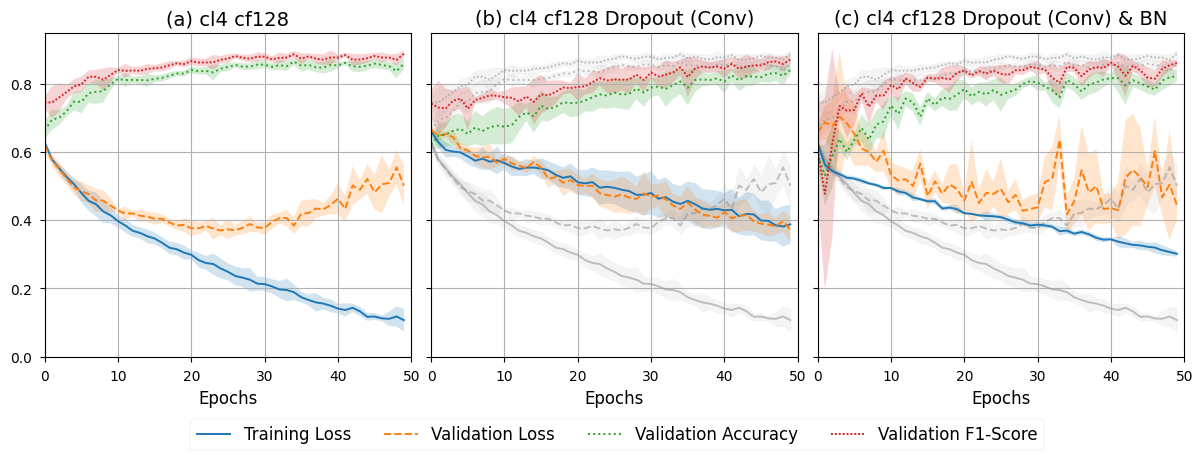

In [21]:
fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(12, 4))


model_1 = 'cl4-cf128-dn-bn0'
y_train_loss_mean_1, y_train_loss_std_1 = get_metric_datapoints('train_loss', model_1)
axs[0].plot(np.arange(0,50), y_train_loss_mean_1, "-", label='Training Loss')
axs[0].fill_between(np.arange(0,50), y_train_loss_mean_1 - y_train_loss_std_1, y_train_loss_mean_1 + y_train_loss_std_1, alpha=0.2)

y_val_loss_mean_1, y_val_loss_std_1 = get_metric_datapoints('validation_loss', model_1)
axs[0].plot(np.arange(0,50), y_val_loss_mean_1, "--", label='Validation Loss')
axs[0].fill_between(np.arange(0,50), y_val_loss_mean_1 - y_val_loss_std_1, y_val_loss_mean_1 + y_val_loss_std_1, alpha=0.2)

y_val_acc_mean_1, y_val_acc_std_1 = get_metric_datapoints('validation_accuracy', model_1)
axs[0].plot(np.arange(0,50), y_val_acc_mean_1, ":", label='Validation Accuracy')
axs[0].fill_between(np.arange(0,50), y_val_acc_mean_1 - y_val_acc_std_1, y_val_acc_mean_1 + y_val_acc_std_1, alpha=0.2)

y_val_f1_mean_1, y_val_f1_std_1 = get_metric_datapoints('validation_f1', model_1)
axs[0].plot(np.arange(0,50), y_val_f1_mean_1, linestyle=(0, (1, 1)), label='Validation F1-Score')
axs[0].fill_between(np.arange(0,50), y_val_f1_mean_1 - y_val_f1_std_1, y_val_f1_mean_1 + y_val_f1_std_1, alpha=0.2)

axs[0].set_title('(a) cl4 cf128', fontsize=BIG_FONT)


y_train_loss_mean_1, y_train_loss_std_1 = get_metric_datapoints('train_loss', model_1)
axs[1].plot(np.arange(0,50), y_train_loss_mean_1, "-", color=GREY, alpha=0.6)
axs[1].fill_between(np.arange(0,50), y_train_loss_mean_1 - y_train_loss_std_1, y_train_loss_mean_1 + y_train_loss_std_1, alpha=0.1, color=GREY)

y_val_loss_mean_1, y_val_loss_std_1 = get_metric_datapoints('validation_loss', model_1)
axs[1].plot(np.arange(0,50), y_val_loss_mean_1, "--", color=GREY, alpha=0.6)
axs[1].fill_between(np.arange(0,50), y_val_loss_mean_1 - y_val_loss_std_1, y_val_loss_mean_1 + y_val_loss_std_1, alpha=0.1, color=GREY)

y_val_acc_mean_1, y_val_acc_std_1 = get_metric_datapoints('validation_accuracy', model_1)
axs[1].plot(np.arange(0,50), y_val_acc_mean_1, ":",  color=GREY, alpha=0.6)
axs[1].fill_between(np.arange(0,50), y_val_acc_mean_1 - y_val_acc_std_1, y_val_acc_mean_1 + y_val_acc_std_1, alpha=0.1, color=GREY)

y_val_f1_mean_1, y_val_f1_std_1 = get_metric_datapoints('validation_f1', model_1)
axs[1].plot(np.arange(0,50), y_val_f1_mean_1, linestyle=(0, (1, 1)), color=GREY, alpha=0.6)
axs[1].fill_between(np.arange(0,50), y_val_f1_mean_1 - y_val_f1_std_1, y_val_f1_mean_1 + y_val_f1_std_1, alpha=0.1, color=GREY)

model_2 = 'cl4-cf128-dm-bn0'
y_train_loss_mean_2, y_train_loss_std_2 = get_metric_datapoints('train_loss', model_2)
axs[1].plot(np.arange(0,50), y_train_loss_mean_2, "-")
axs[1].fill_between(np.arange(0,50), y_train_loss_mean_2 - y_train_loss_std_2, y_train_loss_mean_2 + y_train_loss_std_2, alpha=0.2)

y_val_loss_mean_2, y_val_loss_std_2 = get_metric_datapoints('validation_loss', model_2)
axs[1].plot(np.arange(0,50), y_val_loss_mean_2, "--")
axs[1].fill_between(np.arange(0,50), y_val_loss_mean_2 - y_val_loss_std_2, y_val_loss_mean_2 + y_val_loss_std_2, alpha=0.2)

y_val_acc_mean_2, y_val_acc_std_2 = get_metric_datapoints('validation_accuracy', model_2)
axs[1].plot(np.arange(0,50), y_val_acc_mean_2, ":")
axs[1].fill_between(np.arange(0,50), y_val_acc_mean_2 - y_val_acc_std_2, y_val_acc_mean_2 + y_val_acc_std_2, alpha=0.2)

y_val_f1_mean_2, y_val_f1_std_2 = get_metric_datapoints('validation_f1', model_2)
axs[1].plot(np.arange(0,50), y_val_f1_mean_2, linestyle=(0, (1, 1)))
axs[1].fill_between(np.arange(0,50), y_val_f1_mean_2 - y_val_f1_std_2, y_val_f1_mean_2 + y_val_f1_std_2, alpha=0.2)

axs[1].set_title('(b) cl4 cf128 Dropout (Conv)', fontsize=BIG_FONT)

y_train_loss_mean_1, y_train_loss_std_1 = get_metric_datapoints('train_loss', model_1)
axs[2].plot(np.arange(0,50), y_train_loss_mean_1, "-", color=GREY, alpha=0.6)
axs[2].fill_between(np.arange(0,50), y_train_loss_mean_1 - y_train_loss_std_1, y_train_loss_mean_1 + y_train_loss_std_1, alpha=0.1, color=GREY)

y_val_loss_mean_1, y_val_loss_std_1 = get_metric_datapoints('validation_loss', model_1)
axs[2].plot(np.arange(0,50), y_val_loss_mean_1, "--", color=GREY, alpha=0.6)
axs[2].fill_between(np.arange(0,50), y_val_loss_mean_1 - y_val_loss_std_1, y_val_loss_mean_1 + y_val_loss_std_1, alpha=0.1, color=GREY)

y_val_acc_mean_1, y_val_acc_std_1 = get_metric_datapoints('validation_accuracy', model_1)
axs[2].plot(np.arange(0,50), y_val_acc_mean_1, ":",  color=GREY, alpha=0.6)
axs[2].fill_between(np.arange(0,50), y_val_acc_mean_1 - y_val_acc_std_1, y_val_acc_mean_1 + y_val_acc_std_1, alpha=0.1, color=GREY)

y_val_f1_mean_1, y_val_f1_std_1 = get_metric_datapoints('validation_f1', model_1)
axs[2].plot(np.arange(0,50), y_val_f1_mean_1, linestyle=(0, (1, 1)), color=GREY, alpha=0.6)
axs[2].fill_between(np.arange(0,50), y_val_f1_mean_1 - y_val_f1_std_1, y_val_f1_mean_1 + y_val_f1_std_1, alpha=0.1, color=GREY)

model_3 = 'cl4-cf128-dm-bn1'
y_train_loss_mean_3, y_train_loss_std_3 = get_metric_datapoints('train_loss', model_3)
axs[2].plot(np.arange(0,50), y_train_loss_mean_3, "-")
axs[2].fill_between(np.arange(0,50), y_train_loss_mean_3 - y_train_loss_std_3, y_train_loss_mean_3 + y_train_loss_std_3, alpha=0.2)

y_val_loss_mean_3, y_val_loss_std_3 = get_metric_datapoints('validation_loss', model_3)
axs[2].plot(np.arange(0,50), y_val_loss_mean_3, "--")
axs[2].fill_between(np.arange(0,50), y_val_loss_mean_3 - y_val_loss_std_3, y_val_loss_mean_3 + y_val_loss_std_3, alpha=0.2)

y_val_acc_mean_3, y_val_acc_std_3 = get_metric_datapoints('validation_accuracy', model_3)
axs[2].plot(np.arange(0,50), y_val_acc_mean_3, ":")
axs[2].fill_between(np.arange(0,50), y_val_acc_mean_3 - y_val_acc_std_3, y_val_acc_mean_3 + y_val_acc_std_3, alpha=0.2)

y_val_f1_mean_3, y_val_f1_std_3 = get_metric_datapoints('validation_f1', model_3)
axs[2].plot(np.arange(0,50), y_val_f1_mean_3, linestyle=(0, (1, 1)))
axs[2].fill_between(np.arange(0,50), y_val_f1_mean_3 - y_val_f1_std_3, y_val_f1_mean_3 + y_val_f1_std_3, alpha=0.2)

axs[2].set_title('(c) cl4 cf128 Dropout (Conv) & BN', fontsize=BIG_FONT)



fig.tight_layout()
for ax in axs:
    ax.grid()
    ax.set_xlabel("Epochs", fontsize=SMALL_FONT)
    ax.set_xlim(0,50)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_ylim(0,0.95)
    
fig.legend(loc='center', bbox_to_anchor=(0.515, -0.1),frameon=True, fontsize=SMALL_FONT, ncols=4)
plt.show()
fig.savefig(os.path.join('figures', 'e2-dmbn-example.pdf'), bbox_inches='tight')